In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [14]:
iris = load_iris()
data = iris.data
labels = iris.target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.25, 
                                                    random_state=33)

In [18]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [19]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
y_predict = knc.predict(x_test)

In [20]:
print("the ACC of the KNN is %f" % knc.score(x_test, y_test))

the ACC of the KNN is 0.894737


In [21]:
print(classification_report(y_true=y_test, y_pred=y_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.73      1.00      0.85        11
  virginica       1.00      0.79      0.88        19

avg / total       0.92      0.89      0.90        38



In [23]:
prob = knc.predict_proba(x_test)

In [33]:
fpr, tpr, threhold = roc_curve(y_true=y_test, y_score=prob[:,1], pos_label=1)

In [35]:
print(auc(fpr, tpr))

0.969696969697


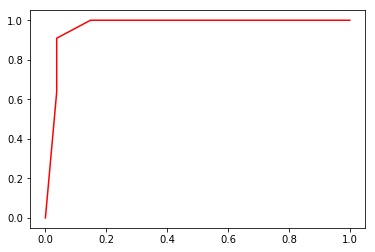

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, "red")